In [ ]:
from meteostat import Point, Daily, Stations
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
stations = Stations()

# PARAMETERS :
# Distance max au cas où un point random est trop loin d'une station :
distance_max = 200000
# Set time period :
start = datetime(2020, 1, 1)
end = datetime(2022, 1, 1)
# Create Points :
#MAT_x = np.arange(43.7, 48.4, 0.5)
MAT_x = np.arange(-60, 82, 1)
#MAT_y = np.arange(-4.5, 7.25, 0.5)
MAT_y = np.arange(-179, 180,1)
MAT = np.zeros((MAT_x.shape[0],MAT_y.shape[0], 2))
# print(MAT.shape)

In [ ]:
## CREATION DE LA BDD REFERENCE : (avec toutes les stations qu'on va utiliser)

for x in range(MAT_x.shape[0]):
    for y in range(MAT_y.shape[0]):
        MAT[x, y] = (MAT_x[x], MAT_y[y])
# print(MAT)

# Create Point for all points in MAT
col_names = stations.nearby(0, 0).fetch(1).columns
loc_df = pd.DataFrame(columns=col_names)
for elt in MAT:
    for elt_bis in elt:
        stations = stations.nearby(elt_bis[0], elt_bis[1])
        # station_data = 
        station_name = stations.fetch(1)
        station_name = station_name[col_names]
        # print(station_name)
        loc_df = pd.concat([loc_df, station_name], ignore_index=True)

dist_df = pd.DataFrame(columns=["name", "distance"])
dist_df = loc_df.loc[:,["name", "distance"]]
#print(dist_df)
dist_df = dist_df.groupby("name").min()
#print(dist_df)
loc_df.drop("distance", axis=1, inplace=True)
#print(loc_df)
loc_df.drop_duplicates(inplace=True)
#print(loc_df)
loc_df = loc_df.join(dist_df,on='name')
#print(loc_df)
loc_df.drop(loc_df[loc_df.distance > distance_max].index, inplace=True)
#print(loc_df)
loc_df.drop(loc_df[loc_df.daily_start > start].index, inplace=True)
loc_df.drop(loc_df[loc_df.daily_end < end].index, inplace=True)
#print(loc_df)
loc_df.drop(["hourly_start", "hourly_end", "monthly_start", "monthly_end"], axis=1, inplace=True)
loc_df.dropna(inplace=True)

In [ ]:
loc_df

,name,country,region,wmo,icao,latitude,longitude,elevation,timezone,daily_start,daily_end,distance
328,Macquarie Island*,AU,TAS,94998,YMMQ,-54.5000,158.9000,6.0,Australia/Hobart,1973-01-01,2023-10-22,55966.607793
1535,Punta Arenas,CL,MA,85934,SCCI,-53.0000,-70.8500,37.0,America/Punta_Arenas,1963-07-02,2023-10-20,10037.814775
1903,Ushuaia Aerodrome,AR,V,87938,SAWH,-54.8000,-68.3167,16.0,America/Argentina/Ushuaia,1957-06-30,2023-10-21,49022.832059
2264,Rio Grande B. A.,AR,V,87934,SAWE,-53.8000,-67.7500,13.0,America/Argentina/Ushuaia,1973-01-01,2023-10-22,27619.542378
2981,Rio Gallegos Aerodrome,AR,Z,87925,SAWG,-51.6167,-69.2833,20.0,America/Argentina/Rio_Gallegos,1956-02-01,2023-10-21,46860.467869
...,...,...,...,...,...,...,...,...,...,...,...,...
48557,Grise Fiord,CA,NU,71971,CWGZ,76.4200,-82.9000,44.0,America/Iqaluit,2007-11-01,2023-10-21,46777.003578
48634,Danmarkshavn,GL,UO,04320,BGDH,76.7667,-18.6667,11.0,America/Godthab,1958-01-01,2023-10-23,27270.976403
49608,Isachsen,CA,NU,71074,CWIC,78.7900,-103.5500,58.0,America/Cambridge_Bay,1948-05-05,2023-09-17,25261.466284
49995,Eureka Airport,CA,NU,71917,CWEU,79.9900,-85.8100,83.0,America/Rankin_Inlet,1947-05-01,2023-10-11,15687.195750


In [ ]:
a = loc_df[loc_df.country=="IN"]
len(a)

40

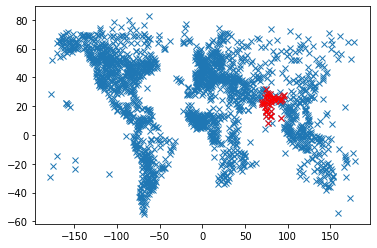

In [ ]:
lati_list = list(loc_df["latitude"])
long_list = list(loc_df["longitude"])

lati_list_pays = list(a["latitude"])
long_list_pays = list(a["longitude"])
plt.plot(long_list,lati_list,'x',long_list_pays,lati_list_pays,'rx')